<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/Main_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBOost Assignment 
## Written by Abiola Obembe
### Date: 2021-02-24
### Course: ML masters with deployment and deep learning
### Objective: Predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost
-----------------------------------------------------------------------------
### ----------  Assignment starts here -------------------------------------------------

## Dataset
In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. The
description of the dataset is as follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes: >50K, <=50K.



*   age: continous.

*   workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.

*   age: continuous.

*   fnlwgt: continuous.

*   education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
    Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
    Doctorate, 5th-6th, Preschool.
    education-num: continuous.  

*   marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

*   occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.

*  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

*   race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

*   sex: Female, Male.

*   capital-gain: continuous.

*   capital-loss: continuous.

*   hours-per-week: continuous.

*   native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [1]:
# Loading Data and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve


# Import other libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)



Libraries installed successfully!


In [2]:
# Loaddataset and print feature columns

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header= None)
#train_set = pd.read_csv('adult.data', header= None)

# Load test dataset and print feature columns

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows= 1, header= None)
#test_set = pd.read_csv('adult.test', skiprows=1, header= None)


# Include column headers in dataframe
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex',
              'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
              
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
# Inspect train set dataframe

train_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Inspect test set dataframe
test_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
# Let's replace "?" in dataframe to NAN
train_set.replace(' ?', np.nan, inplace= True)
test_set = test_set.replace(' ?', np.nan)

test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
# priniting the details about the train dataset

print("\nEDA on Training Set\n")
print("#"*30)

print("\n\nNumber of Features/Columns : ", len(train_set.columns))
print("\nNumber of Rows : ",train_set.shape[0])


print("\n Contains NaN/Empty cells : ", train_set.isnull().values.any())


missing_values = train_set.isnull().sum().sum()
print("\n Total missing values in train dataframe is: \n", str(missing_values))

total_data = np.product(train_set.shape)

print("\n Perecentage of missing values in train dataframe is: \n", str(100*(missing_values/total_data))+'%')


EDA on Training Set

##############################


Number of Features/Columns :  15

Number of Rows :  32561

 Contains NaN/Empty cells :  True

 Total missing values in train dataframe is: 
 4262

 Perecentage of missing values in train dataframe is: 
 0.8726185723206699%


In [7]:
# priniting the details about the test dataset

print("\nEDA on Test Set\n")
print("#"*30)

print("\n\nNumber of Features/Columns : ", len(test_set.columns))
print("\nNumber of Rows : ",test_set.shape[0])


print("\n Contains NaN/Empty cells : ", test_set.isnull().values.any())


missing_values = test_set.isnull().sum().sum()
print("\n Total missing values in test dataframe is: \n", str(missing_values))

total_data = np.product(test_set.shape)

print("\n Perecentage of missing values in test dataframe is: \n", str(100*(missing_values/total_data))+'%')


EDA on Test Set

##############################


Number of Features/Columns :  15

Number of Rows :  16281

 Contains NaN/Empty cells :  True

 Total missing values in test dataframe is: 
 2203

 Perecentage of missing values in test dataframe is: 
 0.9020739921790225%


In [8]:
# Inspect wage_class column : train set
train_set.wage_class.value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

In [9]:
# Inspect wage_class column: test set
test_set.wage_class.value_counts()

 <=50K.    12435
 >50K.      3846
Name: wage_class, dtype: int64

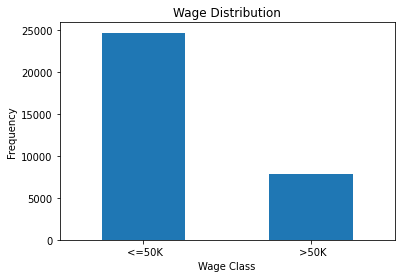

In [10]:
# Let's visualize the distribution of target data ( establishing imbalanced dataset)
count_classes = pd.value_counts(train_set['wage_class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Wage Distribution")
plt.xticks(range(2))
plt.xlabel("Wage Class")
plt.ylabel('Frequency')
plt.show()


### Step 2: Data Cleaning & Preprocessing

In [11]:
# Create new column using dictionary 

new_data_train = { ' >50K': 1, ' <=50K' : 0 } 
new_data_test = {' >50K.': 1, ' <=50K.': 0}

# combine this new data with existing DataFrame 
train_set["wage_class"] = train_set["wage_class"].map(new_data_train)
test_set["wage_class"] = test_set["wage_class"].map(new_data_test)

# combine this new data with existing DataFrame 
#train_set = train_set.replace({"wage_class": new_data}) 

train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [12]:
# Inspect test set
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [13]:
# Let's check the train set dataframe infor
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  wage_class      32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


All column have the appropriate data type and there are some missing values hence we need to clean the dataset

In [14]:
# Define continous and categorical features as one new dataframe
# Extract numerical columns from train dataframe
numerical_cols = [cname for cname in train_set.columns if
                train_set[cname].dtype in ['int64', 'float64']]


categorical_features = [cname for cname in train_set.columns if
                    train_set[cname].dtype == "object"]

categorical_cols = categorical_features.copy()
categorical_cols.append('wage_class')

numerical_features = numerical_cols[:-1]

print(numerical_cols)
print(categorical_cols)
print('*'*900)
print(numerical_features)
print(categorical_features)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class']
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'wage_class']
***********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [15]:
# Drop missing values in test set
test_set.dropna(axis = 0, inplace= True)
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [16]:
# Check cardinality of categrocial columns
# Unique value sin each columns
for cols in categorical_features:
    print("Train-set: Unique values in", cols,  "column in dataset:", train_set[cols].nunique())
    print("Test-set: Unique values in", cols,  "column in dataset:", test_set[cols].nunique())
    print("*"*80)

Train-set: Unique values in workclass column in dataset: 8
Test-set: Unique values in workclass column in dataset: 7
********************************************************************************
Train-set: Unique values in education column in dataset: 16
Test-set: Unique values in education column in dataset: 16
********************************************************************************
Train-set: Unique values in marital_status column in dataset: 7
Test-set: Unique values in marital_status column in dataset: 7
********************************************************************************
Train-set: Unique values in occupation column in dataset: 14
Test-set: Unique values in occupation column in dataset: 14
********************************************************************************
Train-set: Unique values in relationship column in dataset: 6
Test-set: Unique values in relationship column in dataset: 6
*********************************************************************

## Explorartory Data Analysis

In [17]:
# Bascic statistics of the train set
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [18]:
# Calculate the skewness and kurtosis values
for col in train_set[numerical_cols].columns:
    print(col)
    print("skewness:", train_set[col].skew())
    print("kurtosis:", train_set[col].kurtosis())
    print('-'*35)

age
skewness: 0.5587433694130484
kurtosis: -0.16612745957143904
-----------------------------------
fnlwgt
skewness: 1.4469800945789826
kurtosis: 6.218810978153801
-----------------------------------
education_num
skewness: -0.3116758679102297
kurtosis: 0.6234440747629248
-----------------------------------
capital_gain
skewness: 11.953847687699799
kurtosis: 154.79943785425334
-----------------------------------
capital_loss
skewness: 4.594629121679692
kurtosis: 20.3768017134122
-----------------------------------
hours_per_week
skewness: 0.22764253680450092
kurtosis: 2.916686796002066
-----------------------------------
wage_class
skewness: 1.212430242019683
kurtosis: -0.5300454690846639
-----------------------------------


fnlwgt: the high value of kurtosis indicates the presence of tailedness; however the skewness value of 1.44 shows moderate symmetry

capital_gain: high value of skewness and kurtosis indicates that the pdf is not symmetrical and it exhibits taildeness

capital_ loss : the data displays similar charactertistics as the capital_gain column

hours_per_week: the data portrays slight tailedness


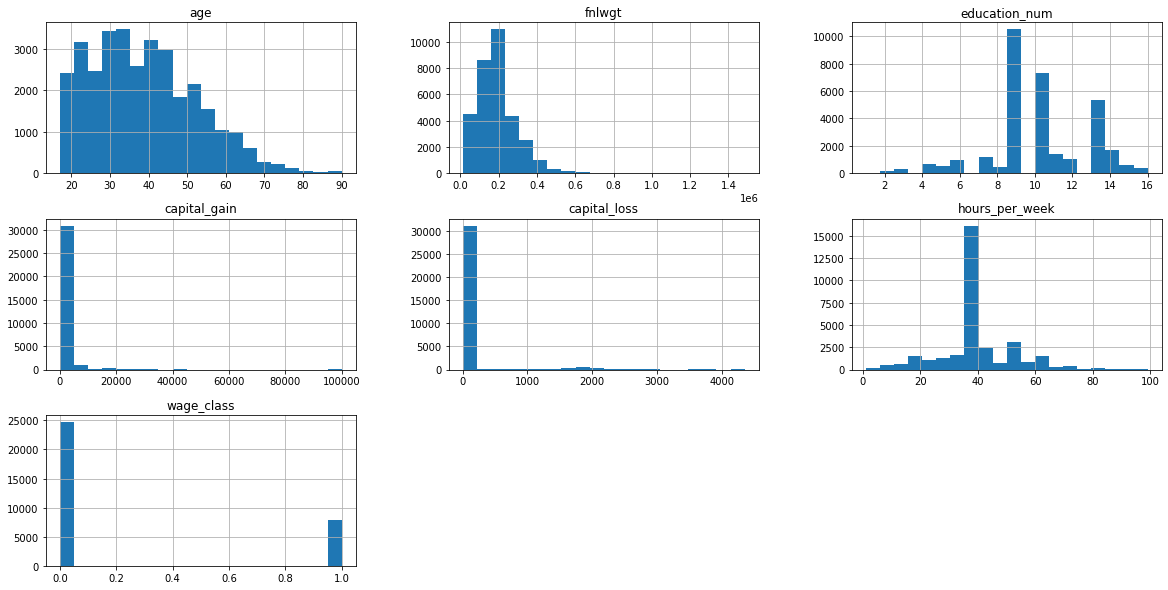

In [19]:
# Visualize histogram of dataset
train_set.hist(figsize= (20,10), bins= 20)
plt.show()

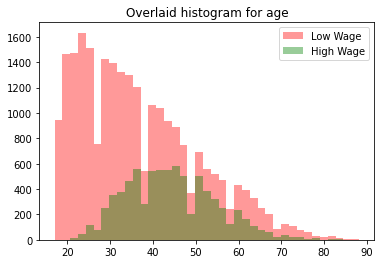

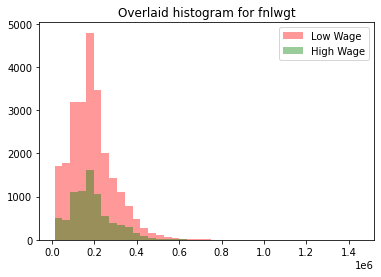

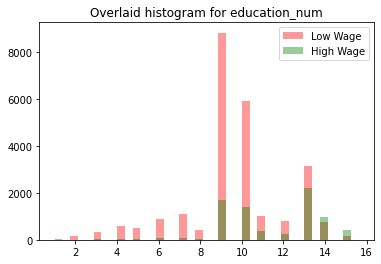

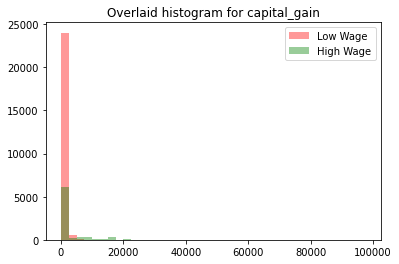

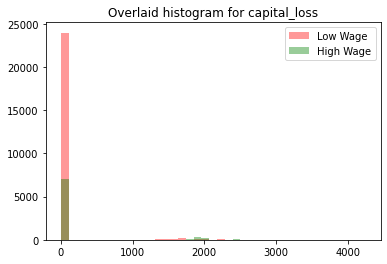

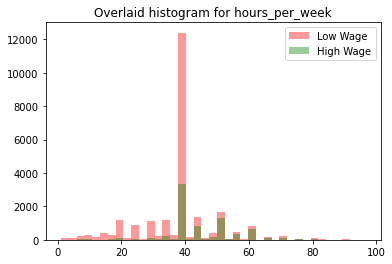

In [20]:
# Plot contiuous features
for i in train_set[numerical_features].columns:
    High = list(train_set[train_set['wage_class'] ==1 ][i].dropna())
    Low = list(train_set[train_set['wage_class'] == 0][i].dropna())
    xmin = min(min(Low), min(High))
    xmax = max(max(Low), max(High))
    width = (xmax - xmin) / 40
    sns.distplot(Low, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(High, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Low Wage', 'High Wage'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 432x288 with 0 Axes>

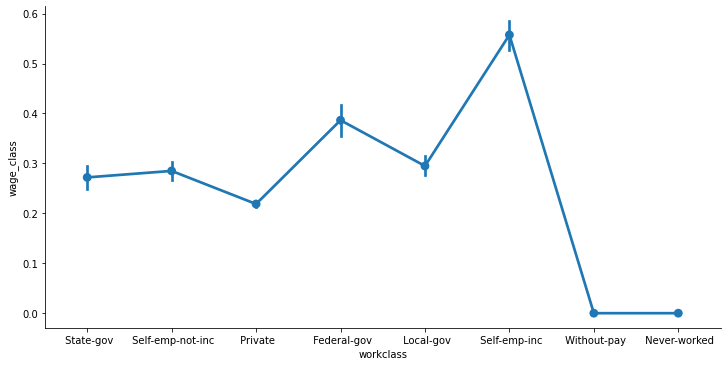

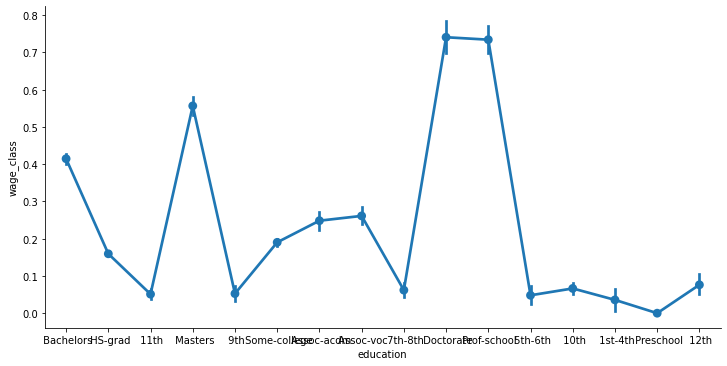

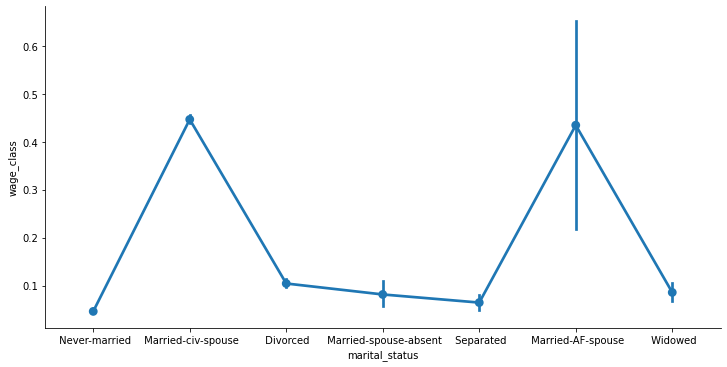

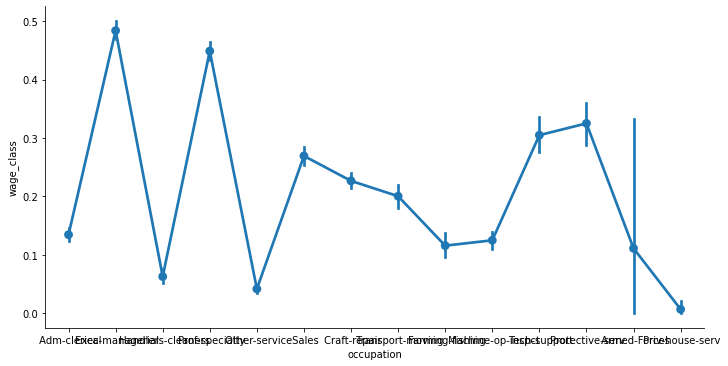

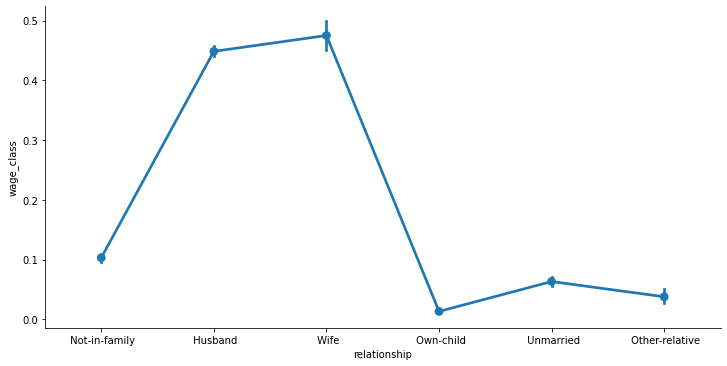

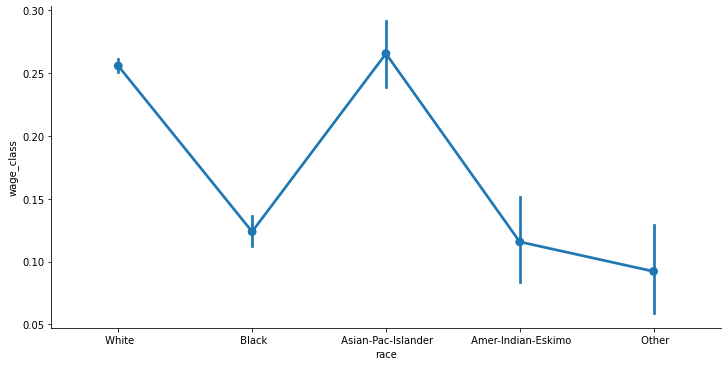

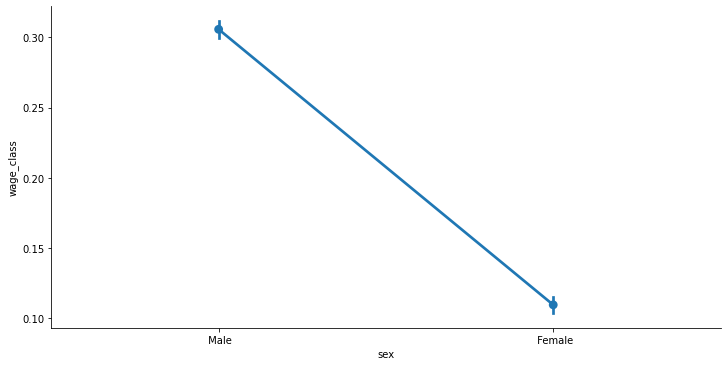

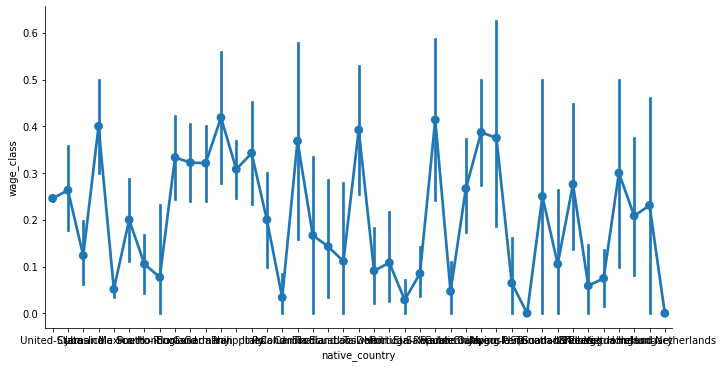

In [21]:
# Investigate the effect of categorical columns on wage
for i, col in enumerate(train_set[categorical_features]):
    plt.figure(i)
    sns.catplot(x=col, y='wage_class', data=train_set, kind='point', aspect=2)

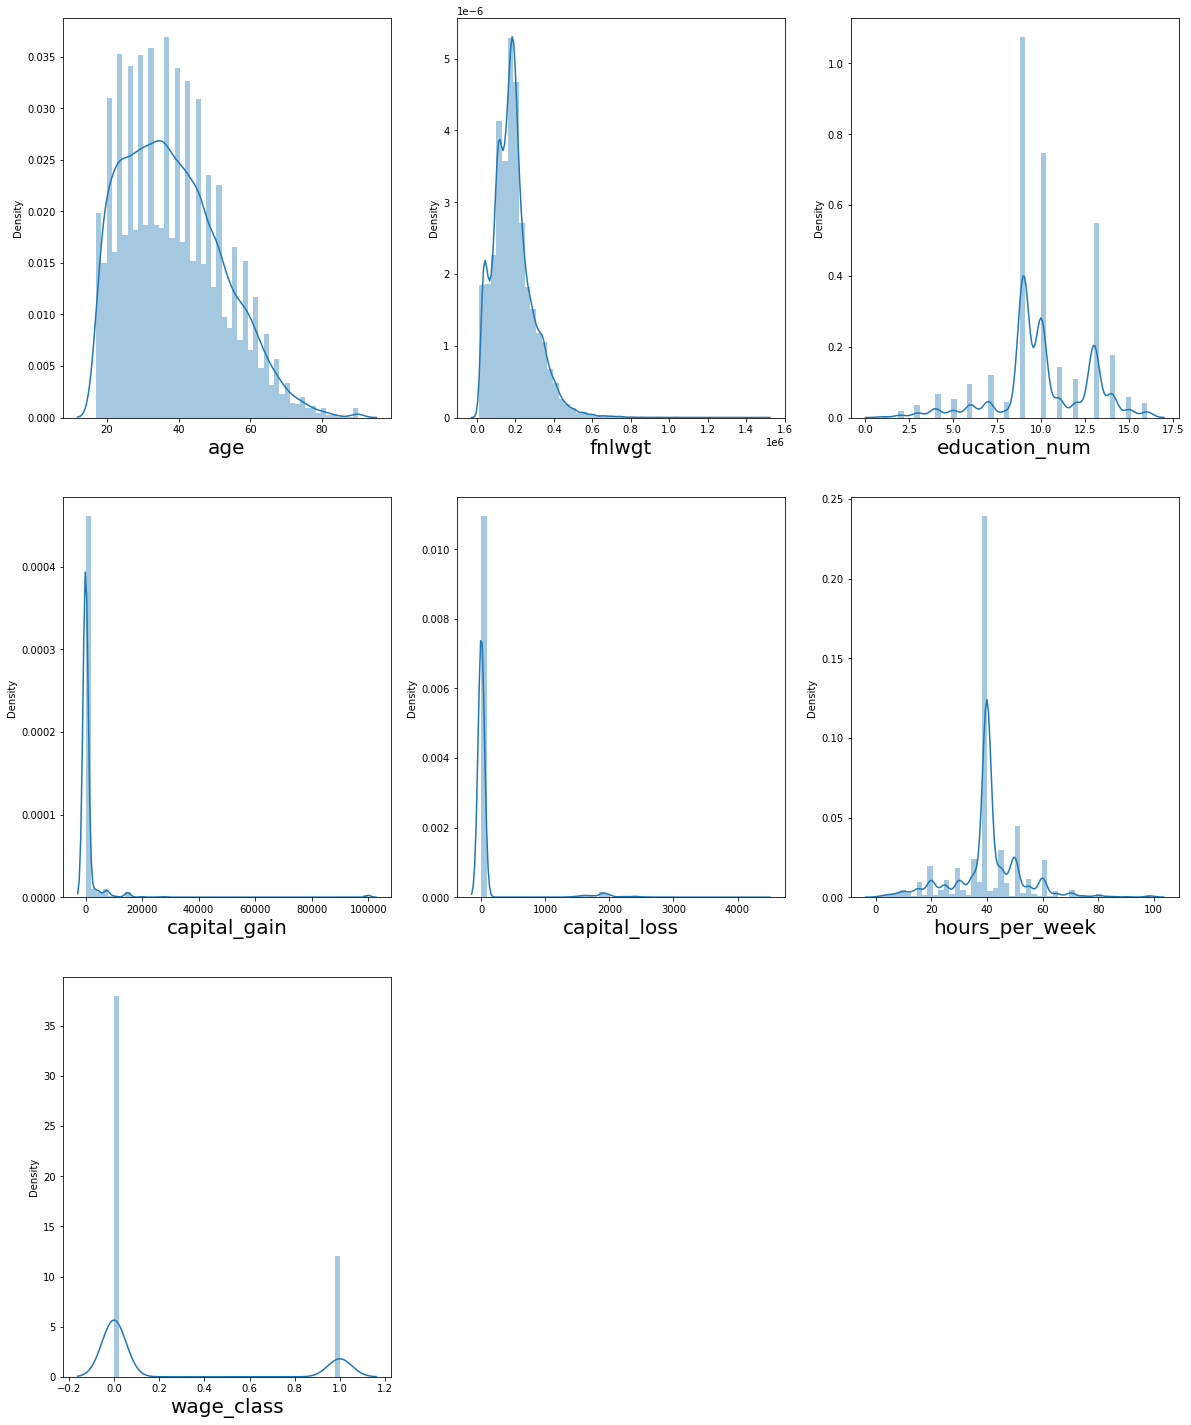

In [22]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_set[numerical_cols]:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train_set[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

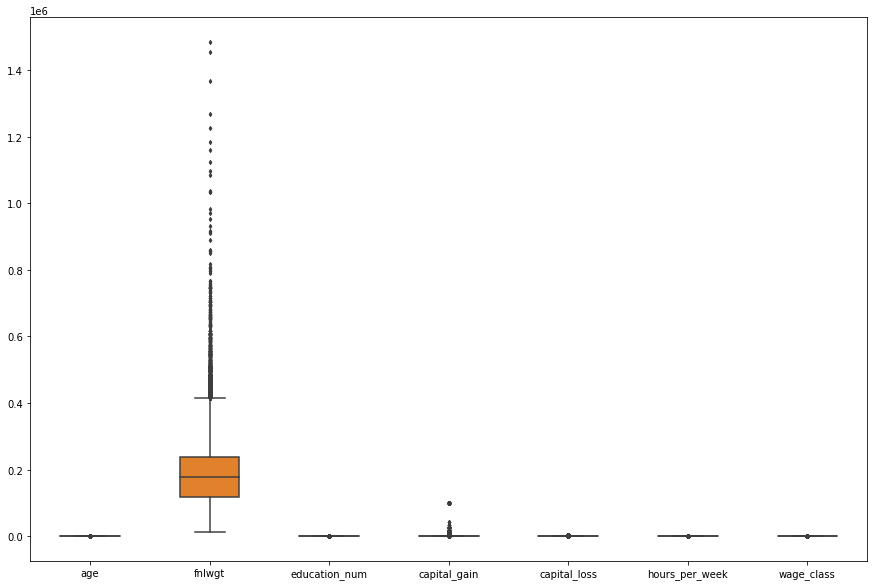

In [23]:
# Check for ouliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=train_set, width= 0.5,ax=ax,  fliersize=3)
plt.show()

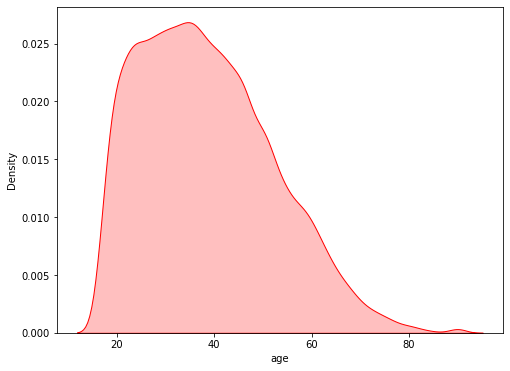

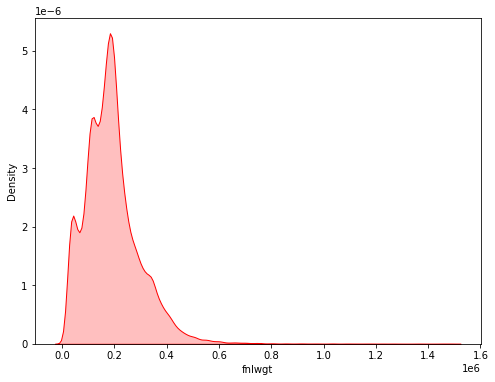

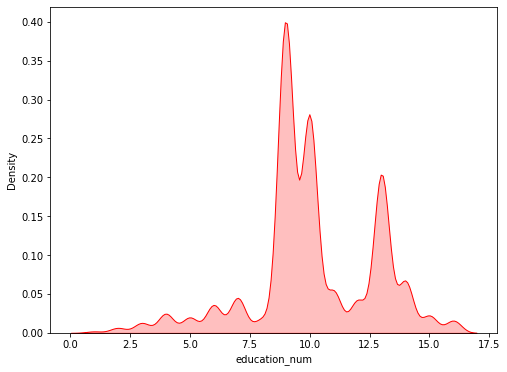

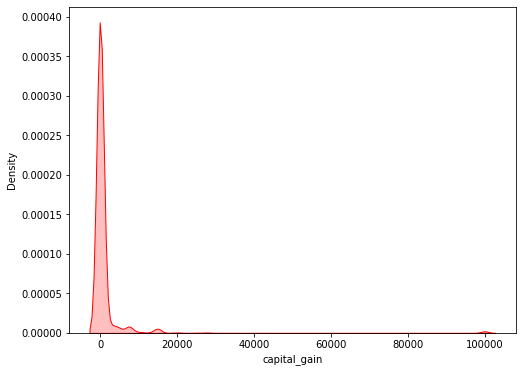

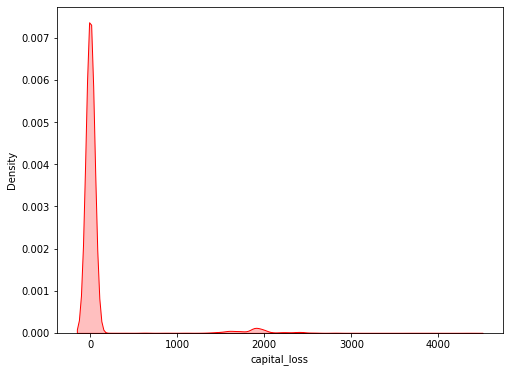

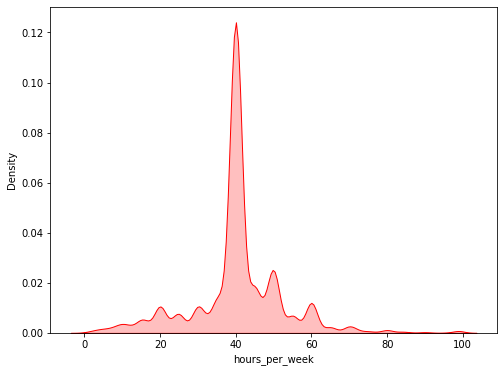

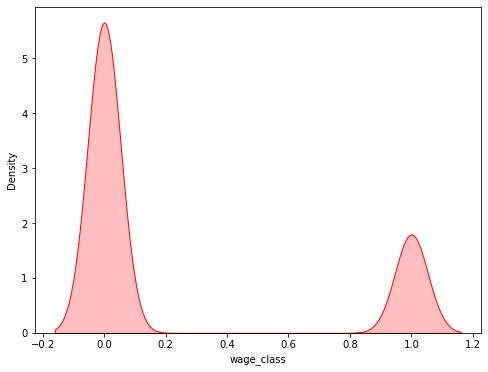

In [24]:
# KDE Plot
for col in train_set[numerical_cols].columns:
    plt.figure(figsize= (8,6))
    ax = sns.kdeplot(train_set[col], shade=True, color="r")
    plt.show()

### Feature Engineering

In [25]:
# Remove rows with missing target, separate target from predictors

y = train_set.wage_class
X = train_set.drop(['wage_class'], axis=1)

y_test = test_set.wage_class
X_test = test_set.drop(['wage_class'], axis = 1)

In [26]:
# Inspect dataframe of features
X.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [27]:
# Inspect targte field
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: wage_class, dtype: int64

In [28]:
# CHECK for missing values: train
X.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
dtype: int64

In [29]:
#Address missing vales
X['workclass']= X['workclass'].fillna(X['workclass'].mode()[0])
X['occupation']= X['occupation'].fillna(X['occupation'].mode()[0])
X['native_country']= X['native_country'].fillna(X['native_country'].mode()[0])

X.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [30]:
# All categorical columns
object_cols = [col for col in X.columns if X[col].dtype == "object"]
object_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [31]:
# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if
                   set(X[col]) == set(X_test[col])]

# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols) - set(good_label_cols))

print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)                  


Categorical columns that will be label encoded: ['education', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

Categorical columns that will be dropped from the dataset: ['workclass', 'native_country']


In [32]:
# Drop categorical columns that will not be encoded
X = X.drop(bad_label_cols, axis=1)
X_test = X_test.drop(bad_label_cols, axis=1)

X.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40


In [33]:
# Lets inspect the numerical features of the dataframe
X[numerical_features].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [34]:
# Let's move ahead and check for multicollinearity.
from sklearn.preprocessing import StandardScaler
sc  =StandardScaler()

X_scaled = sc.fit_transform(X[numerical_features])

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X[numerical_features].columns

vif

,VIF,Features
0,1.019323,age
1,1.007771,fnlwgt
2,1.043670,education_num
3,1.026702,capital_gain
4,1.013466,capital_loss
5,1.031912,hours_per_week


In [35]:
# We drop all columns with VIF greater than 5 due to colineraity 
to_drop_cols = vif[vif['VIF']> 5].Features.tolist()
# Drop columns
X.drop(to_drop_cols, axis= 1, inplace = True)
select_num_columns = X.columns.tolist()
X.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40


Excellent! the VIF < 5 for all the features of numerical type hence we can continue with all the numerical columns.
In the next part we need to address the categorical columns which comprise of ordinal and nominal features. We address the ordinal columns first (education and occupation columns)

In [36]:
# Apply label encoder to education and occupation columns 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['education','occupation']:
    X[col] = label_encoder.fit_transform(X[col])
    X_test[col] = label_encoder.transform(X_test[col])

X.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,77516,9,13,Never-married,0,Not-in-family,White,Male,2174,0,40
1,50,83311,9,13,Married-civ-spouse,3,Husband,White,Male,0,0,13
2,38,215646,11,9,Divorced,5,Not-in-family,White,Male,0,0,40
3,53,234721,1,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40
4,28,338409,9,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40


In [37]:
# All new categorical columns
object_cols = [col for col in X.columns if X[col].dtype == "object"]
object_cols

['marital_status', 'relationship', 'race', 'sex']

In [38]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('sex', 2), ('race', 5), ('relationship', 6), ('marital_status', 7)]

In [39]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['marital_status', 'relationship', 'race', 'sex']

Categorical columns that will be dropped from the dataset: []


In [40]:
X =  pd.get_dummies(X, prefix= low_cardinality_cols, columns= low_cardinality_cols, drop_first= True)
X_test =  pd.get_dummies(X_test, prefix= low_cardinality_cols, columns= low_cardinality_cols, drop_first= True)
X.head()

,age,fnlwgt,education,education_num,occupation,capital_gain,capital_loss,hours_per_week,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,77516,9,13,0,2174,0,40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
1,50,83311,9,13,3,0,0,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,38,215646,11,9,5,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,53,234721,1,7,5,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,28,338409,9,13,9,0,0,40,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [41]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(X[numerical_features]))
zscore

array([[0.03067056, 1.06361075, 1.13473876, 0.1484529 , 0.21665953,
        0.03542945],
       [0.83710898, 1.008707  , 1.13473876, 0.14592048, 0.21665953,
        2.22215312],
       [0.04264203, 0.2450785 , 0.42005962, 0.14592048, 0.21665953,
        0.03542945],
       ...,
       [1.42360965, 0.35877741, 0.42005962, 0.14592048, 0.21665953,
        0.03542945],
       [1.21564337, 0.11095988, 0.42005962, 0.14592048, 0.21665953,
        1.65522476],
       [0.98373415, 0.92989258, 0.42005962, 1.88842434, 0.21665953,
        0.03542945]])

In [42]:
# Check for the presence of outliers
print(np.where(zscore>3))

(array([   10,    23,    28, ..., 32525, 32525, 32531]), array([5, 4, 5, ..., 0, 5, 5]))


In [43]:
# Check for zscore > 3
zscore[zscore>3]

array([3.20416118, 4.85091604, 3.20416118, ..., 3.10979908, 3.19403031,
       4.74296673])

In [44]:
# Check for outliers
X[zscore > 3]

,age,fnlwgt,education,education_num,occupation,capital_gain,capital_loss,hours_per_week,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
10,37,280464,15,10,3,0,0,80,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
23,43,117037,1,7,13,0,2042,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
28,39,367260,11,9,3,0,0,80,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
32,45,386940,9,13,3,0,1408,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
37,19,544091,11,9,0,0,0,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32511,25,514716,9,13,0,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
32518,57,110417,11,9,2,99999,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
32525,81,120478,8,11,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
32525,81,120478,8,11,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [45]:
## For simplicity remove all data with outliers
X_clean = X.copy()
X_clean = X[(zscore < 3).all(axis = 1)]
print("The shape of the original dataframe is :", X.shape)
print("The shape of the clean dataframe is :", X_clean.shape)


deleted_entries = X.shape[0] - X_clean.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (32561, 24)
The shape of the clean dataframe is : (29828, 24)
Entries deleted in the dataframe are : 2733


In [46]:
X_clean.head()

,age,fnlwgt,education,education_num,occupation,capital_gain,capital_loss,hours_per_week,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,77516,9,13,0,2174,0,40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
1,50,83311,9,13,3,0,0,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,38,215646,11,9,5,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,53,234721,1,7,5,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,28,338409,9,13,9,0,0,40,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [47]:
X_test.head()

,age,fnlwgt,education,education_num,occupation,capital_gain,capital_loss,hours_per_week,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,25,226802,1,7,6,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,38,89814,11,9,4,0,0,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,28,336951,7,12,10,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,44,160323,15,10,6,7688,0,40,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,34,198693,0,6,7,0,0,30,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1


In [48]:
# Inspect final dataframe
print(X.shape)
print(X_test.shape)

(32561, 24)
(15060, 24)


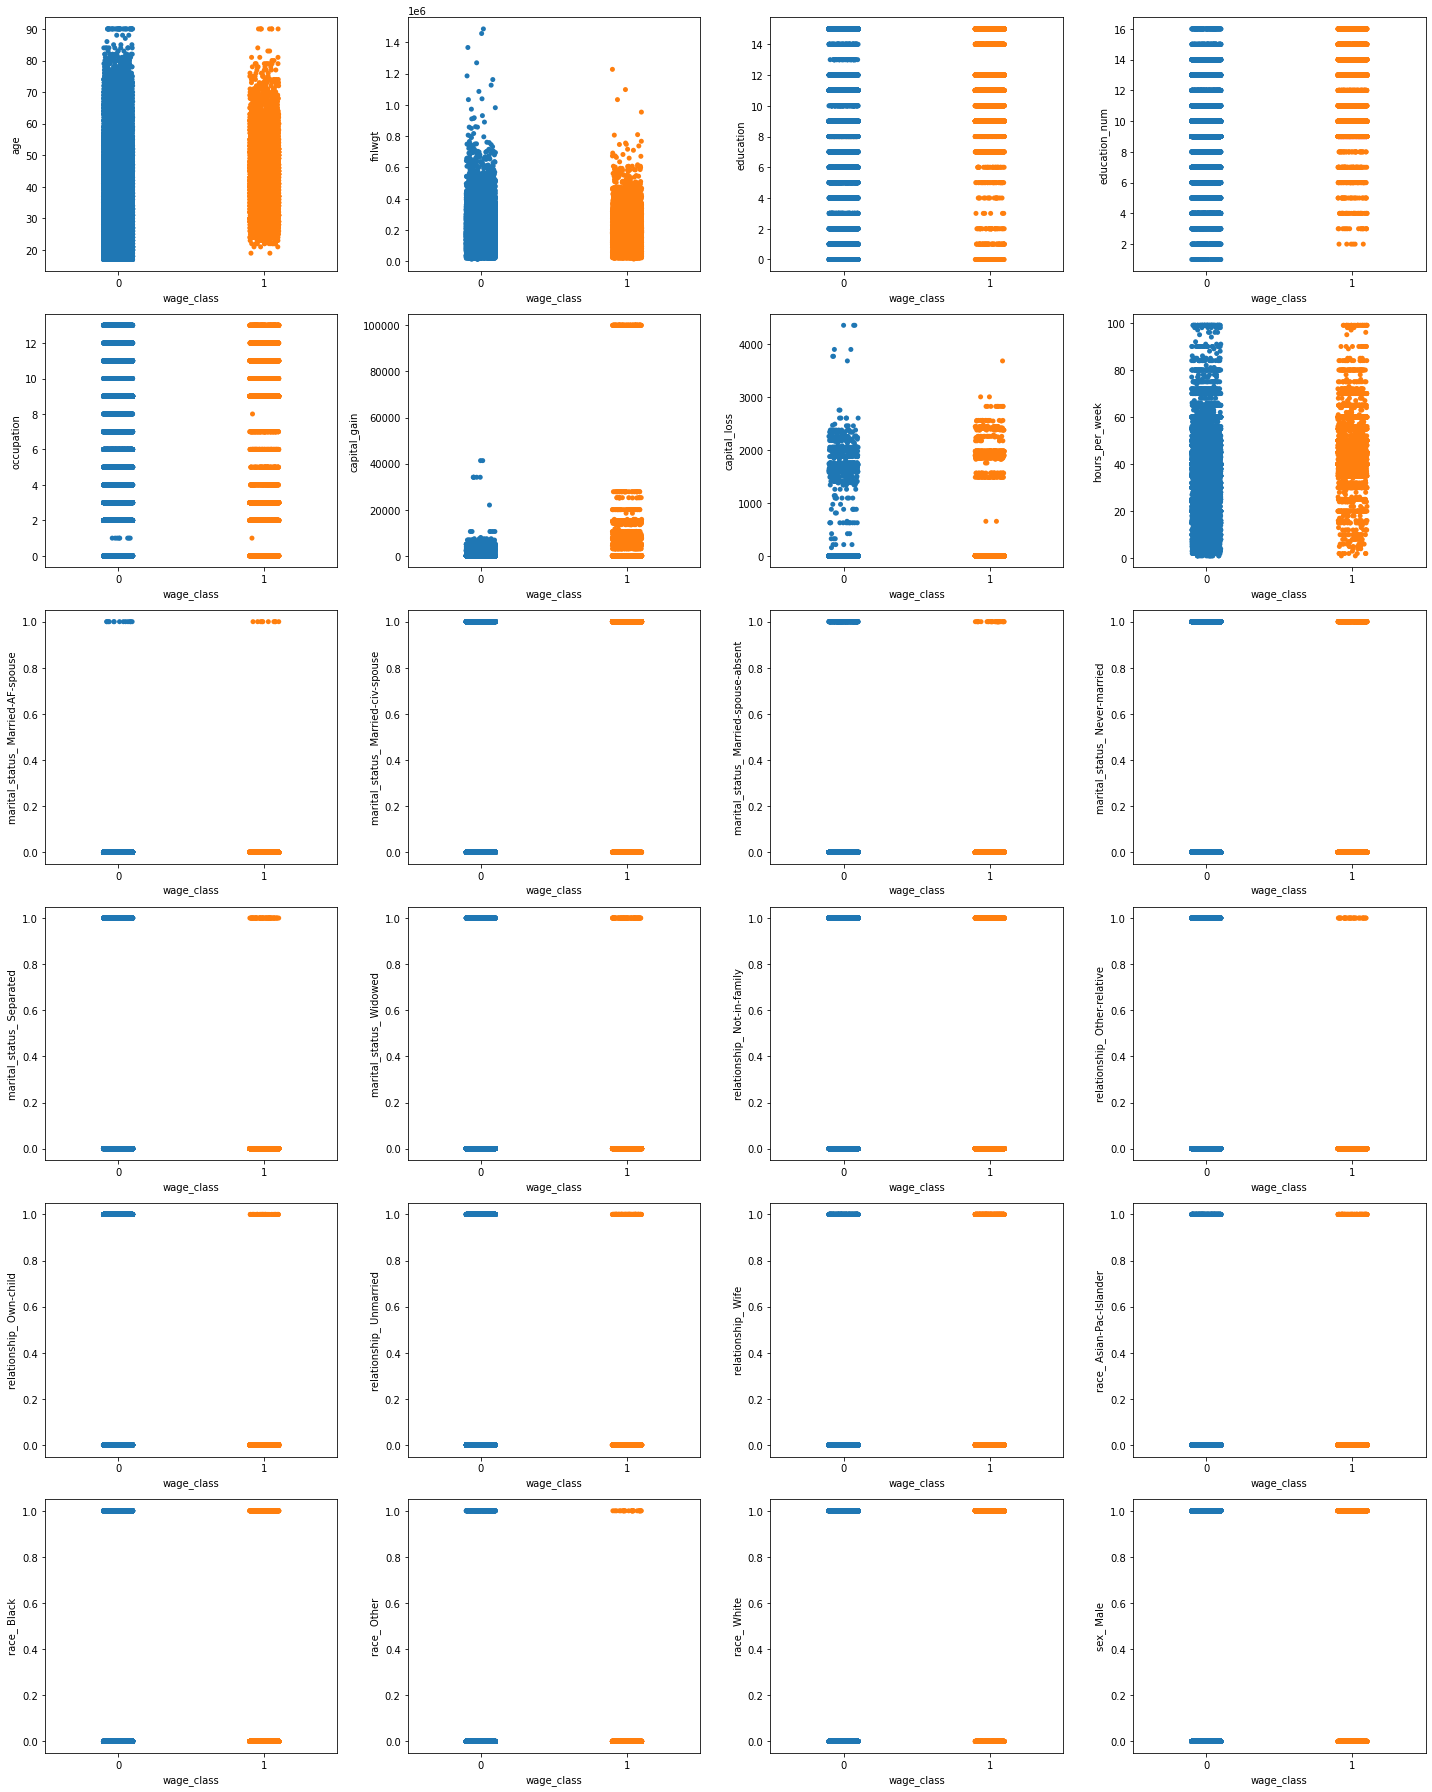

In [49]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=25 :
        ax = plt.subplot(6,4,plotnumber)
        sns.stripplot(y, X[column])
    plotnumber+=1
plt.tight_layout()

In [50]:
# as the datapoints differ a lot in magnitude, we'll scale them
scaler=StandardScaler()
X_train=scaler.fit_transform(X)
X_test = scaler.transform(X_test)
X_train[0:2]

array([[ 0.03067056, -1.06361075, -0.33543693,  1.13473876, -1.54525577,
         0.1484529 , -0.21665953, -0.03542945, -0.02658695, -0.92284068,
        -0.11403678,  1.43105786, -0.1802846 , -0.17735813,  1.70899099,
        -0.17624972, -0.42934582, -0.34403232, -0.22492681, -0.18155194,
        -0.32576824, -0.09161163,  0.4130197 ,  0.70307135],
       [ 0.83710898, -1.008707  , -0.33543693,  1.13473876, -0.79009168,
        -0.14592048, -0.21665953, -2.22215312, -0.02658695,  1.08361066,
        -0.11403678, -0.69878376, -0.1802846 , -0.17735813, -0.58514059,
        -0.17624972, -0.42934582, -0.34403232, -0.22492681, -0.18155194,
        -0.32576824, -0.09161163,  0.4130197 ,  0.70307135]])

In [51]:
# Rearrange y_train 
y_train = y.values
y_train.reshape(len(y_train),1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [52]:
# Rearrange y_test 
y_test = y_test.values
y_test.reshape(len(y_test),1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

### Model Training and Evaluation

Great! Let's go ahead and use Decision Tree Classfier and see how good it fits our data. But first. let's split our data in train and test.

In [53]:
# IMport XGBoost Classfier object and fit
import xgboost
from xgboost import  XGBClassifier
clf = XGBClassifier(objective='binary:logistic')
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
# cheking training accuracy
y_pred = clf.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.8666809987408249

In [55]:
# Evaluate model on test set

y_pred = clf.predict(X_test)

print("accuracy score on test set is :", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)


print("The confusion matrix report on test set is summarized below: ")
print(conf_mat)
print("The classification report on test set is summarized below :")
print(class_report)

accuracy score on test set is : 0.8621513944223107
The confusion matrix report on test set is summarized below: 
[[10787   573]
 [ 1503  2197]]
The classification report on test set is summarized below :
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11360
           1       0.79      0.59      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.84      0.77      0.80     15060
weighted avg       0.86      0.86      0.85     15060



In [56]:
# cheking initial test accuracy
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8621513944223107

In [57]:
# Print other evaluation metrics
from sklearn.metrics import f1_score, precision_score, recall_score
print("The f1 score is :", f1_score(y_test, y_pred))
print("The precision score is :", precision_score(y_test, y_pred))
print("The recall score is :", recall_score(y_test, y_pred))

print("The ROC-AUC score is :", roc_auc_score(y_test, y_pred))

The f1 score is : 0.6791344667697063
The precision score is : 0.7931407942238267
The recall score is : 0.5937837837837838
The ROC-AUC score is : 0.7716718214693566


### Hyperparameter tunning

In [58]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [59]:
# Create grid search object/class
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=param_grid,
                     cv=5,
                    n_jobs =-1)

In [60]:
# Fit model on training set
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100,

In [61]:
# Print best parameters
best_parameters = grid_search.best_params_
print(best_parameters)
print(grid_search.best_score_)

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}
0.870059432260031


In [62]:
# Print best model
best_model = grid_search.best_estimator_
best_model

XGBClassifier( learning_rate=1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [63]:
# Save model
import pickle
# Writing different model files to file
with open( 'XGBoost.pkl', 'wb') as f:
    pickle.dump(best_model,f)
    
with open('standardScalar.pkl', 'wb') as f:
    pickle.dump(scaler,f)

In [64]:
# Let's train model using the best model
best_model.fit(X_train,y_train)

XGBClassifier( learning_rate=1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
# Evaluate model on test set

# Evaluate model on test set

y_pred = best_model.predict(X_test)

print("accuracy score on test set is :", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)


print("The confusion matrix report on test set is summarized below: ")
print(conf_mat)
print("The classification report on test set is summarized below :")
print(class_report)


accuracy score on test set is : 0.8681938911022576
The confusion matrix report on test set is summarized below: 
[[10659   701]
 [ 1284  2416]]
The classification report on test set is summarized below :
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11360
           1       0.78      0.65      0.71      3700

    accuracy                           0.87     15060
   macro avg       0.83      0.80      0.81     15060
weighted avg       0.86      0.87      0.86     15060



In [66]:
# Print other evaluation metrics
print("The f1 score is :", f1_score(y_test, y_pred))
print("The precision score is :", precision_score(y_test, y_pred))
print("The recall score is :", recall_score(y_test, y_pred))

print("The ROC-AUC score is :", roc_auc_score(y_test, y_pred))

The f1 score is : 0.7088161948070999
The precision score is : 0.7751042669233237
The recall score is : 0.652972972972973
The ROC-AUC score is : 0.7956326132470499


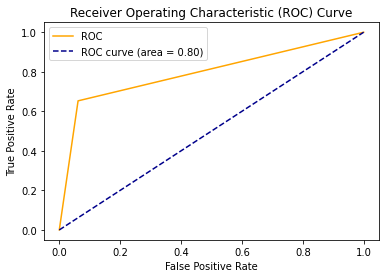

In [67]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()